# Flatiron Hotel Reservations
**Norman Jen & Yamuna Umapathy**

## Business Problem & Understanding:

**Stakeholders:** CEO of Flatiron Hotel

The online Hotel reservations have dramatically changed booking possibilities and customer's behaviours. A significant number of hotel reservations are called-off due to cancellations or no-shows. 
The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with

Goal: In Hotel Reservation Business, what is the likelihood of Cancellation when there is a booking made by a customer. We are trying to find the best model to answer this.

### 1. Dataset and Data Exploration:

For analysis, we are using Hotel Reservation Dataset from Kaggle https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/data. This dataset has no missing values, has 36K rows and 19 columns. Our data set comes from 2 hotels in Portugal, which provided very complete data on approximately 36,000 previous reservations throughout 2017 and 2018, and each record shows booking and arrival info for each customer. 

Numeric Columns    : no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, 
                     no_of_previous_bookings_not_canceled, avg_price_per_room.

Categorical Columns: type_of_meal_plan, required_car_parking_space, room_type_reserved, arrival_year, arrival_month, arrival_date,
                     market_segment_type, repeated_guest, booking_status.


In [3]:
#Importing all libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
hotel_df = pd.read_csv("data/hotel_reservations.csv")
hotel_df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
# Checking the data type for columns
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# checking missing values
hotel_df.isna().sum()
#hotel_df['no_of_special_requests'].value_counts()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [7]:
hotel_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
# Checking the class balance for objects
print(hotel_df['booking_status'].value_counts(),"\n")
print(hotel_df['type_of_meal_plan'].value_counts(normalize=True),"\n")
print(hotel_df['room_type_reserved'].value_counts(normalize=True),"\n")
print(hotel_df['market_segment_type'].value_counts(normalize=True), "\n")
print(hotel_df['arrival_month'].value_counts(), "\n")
print(hotel_df['required_car_parking_space'].value_counts(), "\n")
print(hotel_df['repeated_guest'].value_counts(), "\n")
print(hotel_df['no_of_special_requests'].value_counts(normalize=True))

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64 

type_of_meal_plan
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Plan 3     0.000138
Name: proportion, dtype: float64 

room_type_reserved
Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: proportion, dtype: float64 

market_segment_type
Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: proportion, dtype: float64 

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64 

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64 

repeated_guest
0    35345
1      930
Name: count, dtype: int64 

no_of_special_requests
0    0.545196


### 2. Data Cleaning:

Regarding columns arrival_month, arrival_date and arrival_month, Concatenating all columns to date column 'arrival_date' to use with other columns such as lead_time. 

In [9]:
hotel1_df = hotel_df.copy()
hotel1_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [10]:
# Creating column `arrival_day` by concatenating arrival_year, arrival_month & arrival_date
hotel1_df['arrival_day'] = hotel1_df['arrival_year'].astype(str) + '-' + hotel1_df['arrival_month'].astype(str) + '-' + hotel1_df['arrival_date'].astype(str)
hotel1_df.loc[:, 'arrival_day'] = pd.to_datetime(hotel1_df['arrival_day'], format='%Y-%m-%d', errors='coerce')

# Dropping NA columns for `arrival_day`
hotel1_df = hotel1_df.dropna(subset = ['arrival_day'])
hotel1_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02 00:00:00
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06 00:00:00
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28 00:00:00
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20 00:00:00
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03 00:00:00
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,2018-10-17 00:00:00
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01 00:00:00
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,2018-04-21 00:00:00


In [11]:
# Creating timedelta to find booking_date in Date format
hotel1_df.loc[:,'timedelta'] = pd.to_timedelta(hotel1_df['lead_time'], unit='D')
hotel1_df.loc[:,'arrival_day'] = pd.to_datetime(hotel1_df['arrival_day'])
hotel1_df.loc[:,'booking_date'] = hotel1_df['arrival_day'] - hotel1_df['timedelta']
hotel1_df

C:\Users\uyamu\AppData\Local\Temp\ipykernel_6444\2611191323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_df.loc[:,'timedelta'] = pd.to_timedelta(hotel1_df['lead_time'], unit='D')
C:\Users\uyamu\AppData\Local\Temp\ipykernel_6444\2611191323.py:4: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  hotel1_df.loc[:,'booking_date'] = hotel1_df['arrival_day'] - hotel1_df['timedelta']
C:\Users\uyamu\AppData\Local\Temp\ipykernel_6444\2611191323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,timedelta,booking_date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02 00:00:00,224 days,2017-02-20 00:00:00
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06 00:00:00,5 days,2018-11-01 00:00:00
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,Online,0,0,0,60.00,0,Canceled,2018-02-28 00:00:00,1 days,2018-02-27 00:00:00
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,Online,0,0,0,100.00,0,Canceled,2018-05-20 00:00:00,211 days,2017-10-21 00:00:00
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,Online,0,0,0,94.50,0,Canceled,2018-04-11 00:00:00,48 days,2018-02-22 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03 00:00:00,85 days,2018-05-10 00:00:00
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,Online,0,0,0,90.95,2,Canceled,2018-10-17 00:00:00,228 days,2018-03-03 00:00:00
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01 00:00:00,148 days,2018-02-03 00:00:00
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,Online,0,0,0,94.50,0,Canceled,2018-04-21 00:00:00,63 days,2018-02-17 00:00:00


In [15]:
# Creating booking_month from booking_date
hotel1_df['booking_date'] = pd.to_datetime(hotel1_df['booking_date'])
hotel1_df.loc[:, 'booking_month'] = hotel1_df['booking_date'].dt.month
hotel1_df

C:\Users\uyamu\AppData\Local\Temp\ipykernel_6444\406004971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_df['booking_date'] = pd.to_datetime(hotel1_df['booking_date'])
C:\Users\uyamu\AppData\Local\Temp\ipykernel_6444\406004971.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel1_df.loc[:, 'booking_month'] = hotel1_df['booking_date'].dt.month


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,timedelta,booking_date,booking_month
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,2017-10-02 00:00:00,224 days,2017-02-20,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,2018-11-06 00:00:00,5 days,2018-11-01,11
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,2018-02-28 00:00:00,1 days,2018-02-27,2
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,2018-05-20 00:00:00,211 days,2017-10-21,10
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,2018-04-11 00:00:00,48 days,2018-02-22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0,0,0,167.80,1,Not_Canceled,2018-08-03 00:00:00,85 days,2018-05-10,5
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0,0,0,90.95,2,Canceled,2018-10-17 00:00:00,228 days,2018-03-03,3
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0,0,0,98.39,2,Not_Canceled,2018-07-01 00:00:00,148 days,2018-02-03,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,0,0,94.50,0,Canceled,2018-04-21 00:00:00,63 days,2018-02-17,2


In [16]:
# Making a copy before dropping columns
hotel2_df = hotel1_df.copy()
hotel2_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,timedelta,booking_date,booking_month
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,0,0,65.00,0,Not_Canceled,2017-10-02 00:00:00,224 days,2017-02-20,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,106.68,1,Not_Canceled,2018-11-06 00:00:00,5 days,2018-11-01,11
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,0,0,60.00,0,Canceled,2018-02-28 00:00:00,1 days,2018-02-27,2
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,0,0,100.00,0,Canceled,2018-05-20 00:00:00,211 days,2017-10-21,10
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,94.50,0,Canceled,2018-04-11 00:00:00,48 days,2018-02-22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,...,0,0,0,167.80,1,Not_Canceled,2018-08-03 00:00:00,85 days,2018-05-10,5
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,...,0,0,0,90.95,2,Canceled,2018-10-17 00:00:00,228 days,2018-03-03,3
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,...,0,0,0,98.39,2,Not_Canceled,2018-07-01 00:00:00,148 days,2018-02-03,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,...,0,0,0,94.50,0,Canceled,2018-04-21 00:00:00,63 days,2018-02-17,2


After cleaning the data and adding appropriate columns such as booking_date, booking_month for analysis. Dropping columns
Booking_ID, arrival_year, timedelta which will not be needed later.

In [17]:
# Dropping unnecessary columns
hotel2_df = hotel2_df.drop(columns = ['Booking_ID', 'arrival_year', 'timedelta'], axis = 1)
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,booking_date,booking_month
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02 00:00:00,2017-02-20,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06 00:00:00,2018-11-01,11
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28 00:00:00,2018-02-27,2
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20 00:00:00,2017-10-21,10
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11 00:00:00,2018-02-22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,8,3,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03 00:00:00,2018-05-10,5
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,10,17,Online,0,0,0,90.95,2,Canceled,2018-10-17 00:00:00,2018-03-03,3
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,7,1,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01 00:00:00,2018-02-03,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,4,21,Online,0,0,0,94.50,0,Canceled,2018-04-21 00:00:00,2018-02-17,2


In [18]:
# Creating new column total_guests by adding number of adults and children, Creating column length_of_stay by adding number of weekend_nights & week_nights 

hotel2_df['total_guests'] = hotel2_df['no_of_adults'] + hotel2_df['no_of_children']
hotel2_df['length_of_stay'] = hotel2_df['no_of_weekend_nights'] + hotel2_df['no_of_week_nights']
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,booking_date,booking_month,total_guests,length_of_stay
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,10,2,...,0,0,65.00,0,Not_Canceled,2017-10-02 00:00:00,2017-02-20,2,2,3
1,2,0,2,3,Not Selected,0,Room_Type 1,5,11,6,...,0,0,106.68,1,Not_Canceled,2018-11-06 00:00:00,2018-11-01,11,2,5
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2,28,...,0,0,60.00,0,Canceled,2018-02-28 00:00:00,2018-02-27,2,1,3
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,5,20,...,0,0,100.00,0,Canceled,2018-05-20 00:00:00,2017-10-21,10,2,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,4,11,...,0,0,94.50,0,Canceled,2018-04-11 00:00:00,2018-02-22,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,8,3,...,0,0,167.80,1,Not_Canceled,2018-08-03 00:00:00,2018-05-10,5,3,8
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,10,17,...,0,0,90.95,2,Canceled,2018-10-17 00:00:00,2018-03-03,3,2,4
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,7,1,...,0,0,98.39,2,Not_Canceled,2018-07-01 00:00:00,2018-02-03,2,2,8
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,4,21,...,0,0,94.50,0,Canceled,2018-04-21 00:00:00,2018-02-17,2,2,3


In [19]:
hotel2_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_date,booking_month,total_guests,length_of_stay
count,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238.000000,36238,36238.000000,36238.000000,36238.000000
mean,1.845301,0.105221,0.810475,2.204206,0.030934,85.275070,7.429190,15.583310,0.025553,0.023346,0.152961,103.437259,0.619957,2018-02-28 10:01:23.050940928,6.109195,1.950522,3.014681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-10-17 00:00:00,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2017-12-05 00:00:00,3.000000,2.000000,2.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-02-23 00:00:00,6.000000,2.000000,3.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-06-12 00:00:00,9.000000,2.000000,4.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-30 00:00:00,12.000000,12.000000,24.000000
std,0.518572,0.402540,0.870992,1.410784,0.173142,85.953561,3.066563,8.734404,0.157801,0.368483,1.753366,35.084264,0.786403,NaN,3.571383,0.650046,1.786058


In [20]:
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  object        
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  object        
 7   lead_time                             36238 non-null  int64         
 8   arrival_month                         36238 non-null  int64         
 9   arrival_date                          36238 non-null  int64         
 10  mar


Assigning/Replacing some categorical columns from objects to numbers, this process helps us to cut down columns after preprocessing steps.


In [21]:
# Categorizing type_of_meal_plan, market_segment_type, booking_status and room_type_reserved replacing with unique numbers before ohe

hotel2_df['type_of_meal_plan'] = hotel2_df['type_of_meal_plan'].replace({'Not Selected':0, 'Meal Plan 1':1, 'Meal Plan 2':2, 'Meal Plan 3':3})
hotel2_df['market_segment_type'] = hotel2_df['market_segment_type'].replace({'Corporate':'Other','Complementary':'Other','Aviation':'Other'})
hotel2_df['market_segment_type'] = hotel2_df['market_segment_type'].replace({'Online':0,'Offline':1,'Other':2})
hotel2_df['booking_status'] = hotel2_df['booking_status'].replace({'Not_Canceled':0, 'Canceled':1})
hotel2_df['room_type_reserved'] = hotel2_df['room_type_reserved'].replace({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,arrival_day,booking_date,booking_month,total_guests,length_of_stay
0,2,0,1,2,1,0,1,224,10,2,...,0,0,65.00,0,0,2017-10-02 00:00:00,2017-02-20,2,2,3
1,2,0,2,3,0,0,1,5,11,6,...,0,0,106.68,1,0,2018-11-06 00:00:00,2018-11-01,11,2,5
2,1,0,2,1,1,0,1,1,2,28,...,0,0,60.00,0,1,2018-02-28 00:00:00,2018-02-27,2,1,3
3,2,0,0,2,1,0,1,211,5,20,...,0,0,100.00,0,1,2018-05-20 00:00:00,2017-10-21,10,2,2
4,2,0,1,1,0,0,1,48,4,11,...,0,0,94.50,0,1,2018-04-11 00:00:00,2018-02-22,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,8,3,...,0,0,167.80,1,0,2018-08-03 00:00:00,2018-05-10,5,3,8
36271,2,0,1,3,1,0,1,228,10,17,...,0,0,90.95,2,1,2018-10-17 00:00:00,2018-03-03,3,2,4
36272,2,0,2,6,1,0,1,148,7,1,...,0,0,98.39,2,0,2018-07-01 00:00:00,2018-02-03,2,2,8
36273,2,0,0,3,0,0,1,63,4,21,...,0,0,94.50,0,1,2018-04-21 00:00:00,2018-02-17,2,2,3


#### 3. Preprocessing:

Categorical columns room_type_reserved, market_segment_type, no_of_special_requests has to preprocessed using One Hot Encoder. Meanwhile, date columns arrival_day and booking_date can be parsed back to date,month and year for analysis.

In [25]:
hotel2_df['booking_day'] = hotel2_df['booking_date'].dt.day
hotel2_df['booking_year'] = hotel2_df['booking_date'].dt.year
hotel2_df['arrival_day'] = pd.to_datetime(hotel2_df['arrival_day'])
hotel2_df['arrival_year'] = hotel2_df['arrival_day'].dt.year
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,no_of_special_requests,booking_status,arrival_day,booking_date,booking_month,total_guests,length_of_stay,booking_day,booking_year,arrival_year
0,2,0,1,2,1,0,1,224,10,2,...,0,0,2017-10-02,2017-02-20,2,2,3,20,2017,2017
1,2,0,2,3,0,0,1,5,11,6,...,1,0,2018-11-06,2018-11-01,11,2,5,1,2018,2018
2,1,0,2,1,1,0,1,1,2,28,...,0,1,2018-02-28,2018-02-27,2,1,3,27,2018,2018
3,2,0,0,2,1,0,1,211,5,20,...,0,1,2018-05-20,2017-10-21,10,2,2,21,2017,2018
4,2,0,1,1,0,0,1,48,4,11,...,0,1,2018-04-11,2018-02-22,2,2,2,22,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,8,3,...,1,0,2018-08-03,2018-05-10,5,3,8,10,2018,2018
36271,2,0,1,3,1,0,1,228,10,17,...,2,1,2018-10-17,2018-03-03,3,2,4,3,2018,2018
36272,2,0,2,6,1,0,1,148,7,1,...,2,0,2018-07-01,2018-02-03,2,2,8,3,2018,2018
36273,2,0,0,3,0,0,1,63,4,21,...,0,1,2018-04-21,2018-02-17,2,2,3,17,2018,2018


In [96]:
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  int64         
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  int64         
 7   lead_time                             36238 non-null  int64         
 8   arrival_month                         36238 non-null  int64         
 9   arrival_date                          36238 non-null  int64         
 10  mar

In [26]:
# Dropping `arrival_date`, `booking_date`
hotel2_df.drop(columns = ['arrival_day', 'booking_date'], axis=1, inplace=True)
hotel2_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_month,total_guests,length_of_stay,booking_day,booking_year,arrival_year
0,2,0,1,2,1,0,1,224,10,2,...,0,65.00,0,0,2,2,3,20,2017,2017
1,2,0,2,3,0,0,1,5,11,6,...,0,106.68,1,0,11,2,5,1,2018,2018
2,1,0,2,1,1,0,1,1,2,28,...,0,60.00,0,1,2,1,3,27,2018,2018
3,2,0,0,2,1,0,1,211,5,20,...,0,100.00,0,1,10,2,2,21,2017,2018
4,2,0,1,1,0,0,1,48,4,11,...,0,94.50,0,1,2,2,2,22,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,8,3,...,0,167.80,1,0,5,3,8,10,2018,2018
36271,2,0,1,3,1,0,1,228,10,17,...,0,90.95,2,1,3,2,4,3,2018,2018
36272,2,0,2,6,1,0,1,148,7,1,...,0,98.39,2,0,2,2,8,3,2018,2018
36273,2,0,0,3,0,0,1,63,4,21,...,0,94.50,0,1,2,2,3,17,2018,2018


In [139]:
hotel2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36238 non-null  int64  
 1   no_of_children                        36238 non-null  int64  
 2   no_of_weekend_nights                  36238 non-null  int64  
 3   no_of_week_nights                     36238 non-null  int64  
 4   type_of_meal_plan                     36238 non-null  int64  
 5   required_car_parking_space            36238 non-null  int64  
 6   room_type_reserved                    36238 non-null  int64  
 7   lead_time                             36238 non-null  int64  
 8   arrival_month                         36238 non-null  int64  
 9   arrival_date                          36238 non-null  int64  
 10  market_segment_type                   36238 non-null  int64  
 11  repeated_guest      

In [27]:
# Checking correlation factor with our target`booking_status` and other features. Looks like lead_time, no_of_special_requests, booking_month,
# no_of_nights, avg_price_per_room has higher correlation with target

hotel2_df.corr()['booking_status'].map(abs).sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.438629
no_of_special_requests                  0.253339
arrival_year                            0.179762
avg_price_per_room                      0.142721
market_segment_type                     0.136291
booking_month                           0.134092
repeated_guest                          0.107490
length_of_stay                          0.103474
no_of_week_nights                       0.092904
total_guests                            0.089598
no_of_adults                            0.086671
required_car_parking_space              0.086053
no_of_weekend_nights                    0.061704
no_of_previous_bookings_not_canceled    0.060046
type_of_meal_plan                       0.049641
booking_day                             0.047622
no_of_previous_cancellations            0.033871
no_of_children                          0.033033
room_type_reserved                      0.023313
arrival_month       

<Axes: >

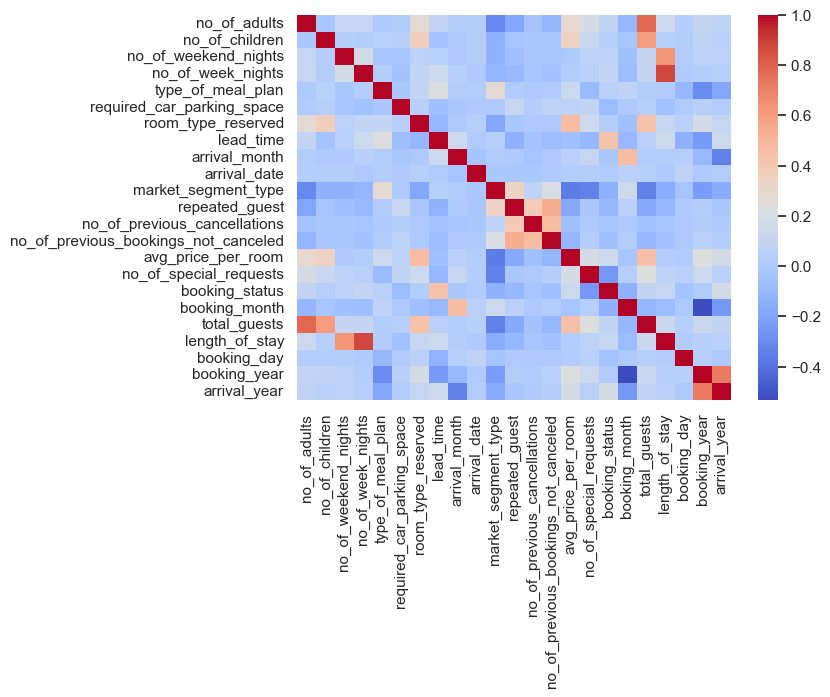

In [73]:
import seaborn as sns
sns.set(rc={'figure.figsize':(7,5)})

# Use the .heatmap function to depict the relationships visually!
sns.heatmap(hotel2_df.corr(), cmap = "coolwarm")

#### 4. Logistic Regression as Baseline Model:

Starting our Baseline model with train_test_split, and Logistic Regression. Since Target `booking_status` is binary classfication.

In [91]:
# Using Train_test_split before starting preprocessing
feature_selected = ['booking_status', 'no_of_adults', 'no_of_children', 'total_guests', 'no_of_weekend_nights', 'no_of_week_nights', 'length_of_stay', 'lead_time','no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations', 'avg_price_per_room', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'arrival_date', 'arrival_year', 'market_segment_type', 'repeated_guest', 'no_of_special_requests', 'booking_day', 'booking_month', 'booking_year']
df = hotel2_df[feature_selected]
X = df.drop(columns = ['booking_status'], axis=1)
y = df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [92]:
# OneHotEncoder for cat_columns

X_train_Nominal = X_train[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'repeated_guest',
               'no_of_special_requests', 'booking_day', 'booking_month']]
X_test_Nominal = X_test[['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'repeated_guest',
               'no_of_special_requests', 'booking_day', 'booking_month']]

ohe = OneHotEncoder(drop = 'first', sparse = False)
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train_Nominal))
X_test_encoded = pd.DataFrame(ohe.transform(X_test_Nominal))


In [93]:
# StandardScaler for numeric columns

X_train_numeric = X_train[['no_of_adults', 'no_of_children', 'total_guests','no_of_weekend_nights', 'no_of_week_nights', 'length_of_stay', 'lead_time','no_of_previous_bookings_not_canceled',
                   'no_of_previous_cancellations', 'avg_price_per_room']]
X_test_numeric = X_test[['no_of_adults', 'no_of_children', 'total_guests','no_of_weekend_nights', 'no_of_week_nights', 'length_of_stay', 'lead_time','no_of_previous_bookings_not_canceled',
                   'no_of_previous_cancellations', 'avg_price_per_room']]

ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_numeric))
X_test_scaled = pd.DataFrame(ss.transform(X_test_numeric))


In [94]:
X_train = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_test = pd.concat([X_test_encoded, X_test_scaled], axis=1)

logreg = LogisticRegression(fit_intercept = False, max_iter = 1000, C = 1e5, solver = 'liblinear', random_state=100)
log_model = logreg.fit(X_train, y_train)

In [34]:
y_pred = logreg.predict(X_test)
y_score = logreg.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.90      0.83      0.87      7905
           1       0.63      0.76      0.69      2967

    accuracy                           0.81     10872
   macro avg       0.77      0.80      0.78     10872
weighted avg       0.83      0.81      0.82     10872



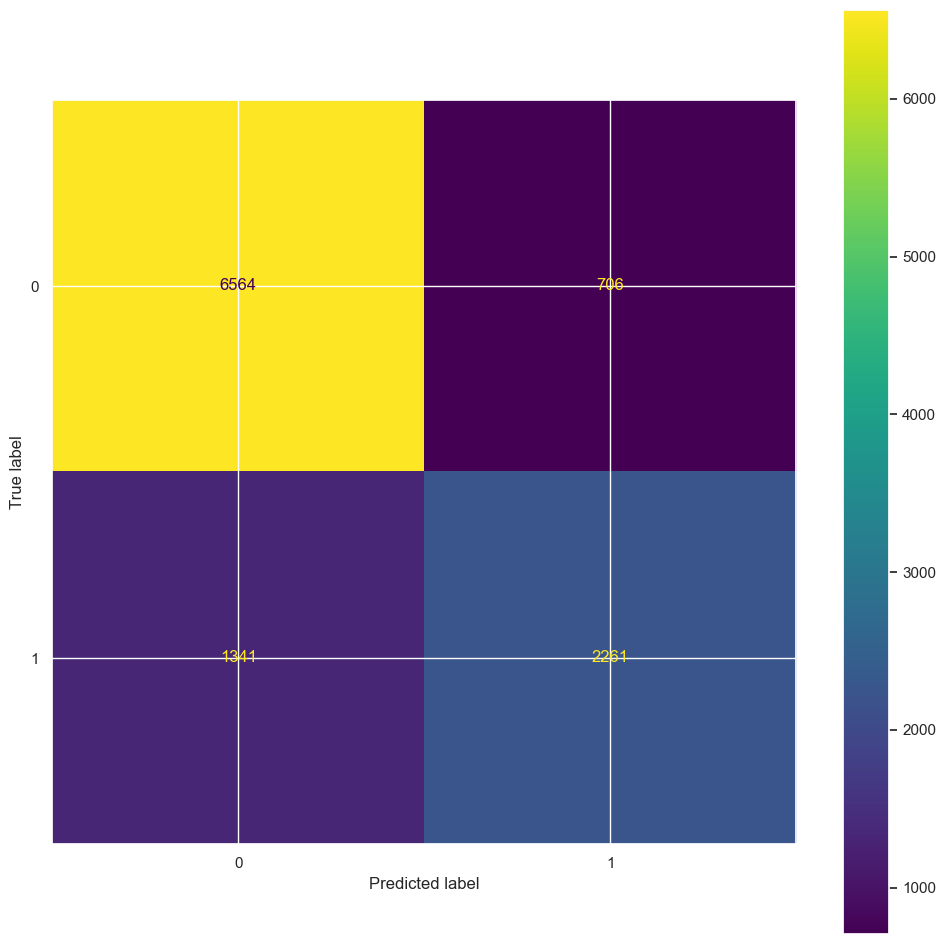

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test);
print(classification_report(y_pred, y_test))


In [36]:
log_model.score(X_train, y_train)

0.8152251044705511

In [37]:
print("precision:",precision_score(y_test, y_pred))
print("recall:",recall_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])
print("AUC:", auc(fpr,tpr))

precision: 0.7620492079541624
recall: 0.6277068295391449
Accuracy: 0.8117181751287712
F1 Score: 0.6883848378748668
AUC: 0.8731184799519143


#### 5. Logistic Regression with High Correlated Feature Selection:

Based on Correlation factor with our Target `booking_status`, by choosing high correlated features to find best model.

In [95]:
# Choosing X_train with high correlated features

X = hotel2_df.drop(columns = ['booking_status'], axis=1)
y = hotel2_df['booking_status']
X_train_hicorr, X_test_hicorr, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

# OneHotEncoder for cat_columns
ohe = OneHotEncoder(drop = 'first', sparse = False)
X_train_hicorr_Nominal = X_train_hicorr[['market_segment_type', 'repeated_guest','booking_month']]
X_test_hicorr_Nominal = X_test_hicorr[['market_segment_type', 'repeated_guest','booking_month']]
X_train_hicorr_encoded = pd.DataFrame(ohe.fit_transform(X_train_hicorr_Nominal))
X_test_hicorr_encoded = pd.DataFrame(ohe.transform(X_test_hicorr_Nominal))

# StandardScaler for numeric columns

ss = StandardScaler()
X_train_hicorr_numeric = X_train_hicorr[['lead_time', 'no_of_special_requests', 'avg_price_per_room', 'length_of_stay', 'total_guests']]
X_test_hicorr_numeric = X_test_hicorr[['lead_time', 'no_of_special_requests', 'avg_price_per_room', 'length_of_stay', 'total_guests']]
X_train_hicorr_scaled = pd.DataFrame(ss.fit_transform(X_train_hicorr_numeric))
X_test_hicorr_scaled = pd.DataFrame(ss.transform(X_test_hicorr_numeric))

X_train_hicorr = pd.concat([X_train_hicorr_encoded, X_train_hicorr_scaled], axis=1)
X_test_hicorr = pd.concat([X_test_hicorr_encoded, X_test_hicorr_scaled], axis=1)

In [39]:
logreg_hicorr = LogisticRegression(fit_intercept = False, max_iter = 1000, C = 1e5, solver = 'liblinear', random_state=100)
log_model = logreg_hicorr.fit(X_train_hicorr, y_train)

y_pred_hicorr = logreg_hicorr.predict(X_test_hicorr)
y_score_hicorr = logreg_hicorr.predict_proba(X_test_hicorr)

print("Metric Scores for High Correlated Features")
print("Precision:",precision_score(y_test, y_pred_hicorr))
print("Recall:",recall_score(y_test, y_pred_hicorr))
print("Accuracy:", accuracy_score(y_test, y_pred_hicorr))
print("F1 Score:", f1_score(y_test, y_pred_hicorr))

Metric Scores for High Correlated Features
Precision: 0.7408394403730846
Recall: 0.617434758467518
Accuracy: 0.8016924208977189
F1 Score: 0.6735311932162326


AUC: 0.8754728574298094
AUC: 0.8549572986732878


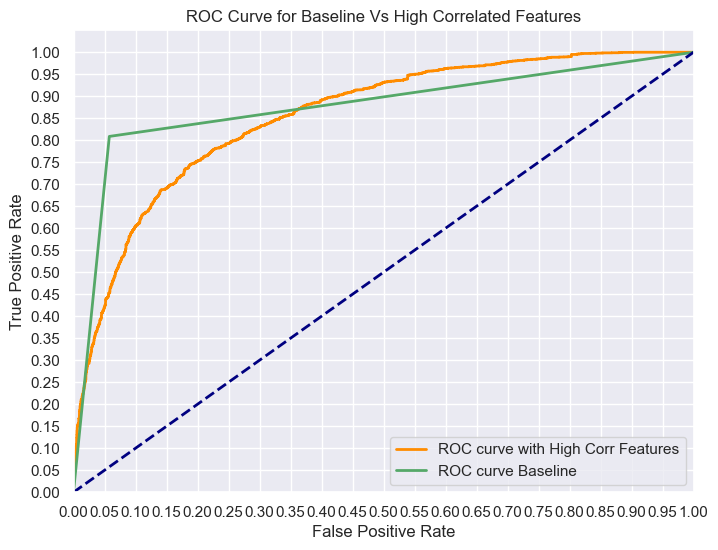

In [76]:
#Visualized ROC Curve for baseline vs high correlated features
print('AUC: {}'.format(auc(fpr, tpr)))

fpr_hicorr, tpr_hicorr, thresholds_hicorr = roc_curve(y_test, y_score_hicorr[:,1])
print('AUC: {}'.format(auc(fpr_hicorr, tpr_hicorr)))

plt.figure(figsize=(8,6))
lw = 2
plt.plot(fpr_hicorr, tpr_hicorr, color='darkorange',
         lw=lw, label='ROC curve with High Corr Features')
plt.plot(fpr, tpr, color='g',
         lw=lw, label='ROC curve Baseline')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Baseline Vs High Correlated Features')
plt.legend(loc='lower right')
plt.show()

Above Graph has high AUC score .87 for Baseline Logistic Regression model Vs model with high correlated Features.

#### 6. Decision Tree:

Checking to find our best model with Decision Tree, determining the optimal hyperparameters for a decision tree model and evaluate 
the model performance.

**Maximum Tree Depth:**
Checking the best depth parameter for our decision tree. 

In [124]:
from sklearn.tree import DecisionTreeClassifier

X = hotel2_df.drop(columns = ['booking_status'], axis=1)
y = hotel2_df['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

max_depths = list(range(1, 50))
train_results_depth = []
test_results_depth = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    # Add auc score to previous train results
    train_results_depth.append(roc_auc)
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    # Add auc score to previous test results
    test_results_depth.append(roc_auc)


**Minimum Sample Splits:**
Checking our best min Sample splits for our decision tree.

In [125]:
# Identifying the optimal Sample splits

min_samples_splits = np.linspace(0.01, 1.0, 10, endpoint=True)
train_results_splits = []
test_results_splits = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results_splits.append(roc_auc)
    y_pred = dt.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results_splits.append(roc_auc)



**Minimum Sample Leafs:** 
Checking for the best min_samples_leafs parameter value for our decision tree.

In [126]:
#Identifying optimal value for min Sample leaf

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results_leaf = []
test_results_leaf = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_leaf.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_leaf.append(roc_auc)


**Maximum Features:**
Checking the maximum feature parameter value for our decision tree.

In [127]:
# Identifying max feature parameter value

max_features = list(range(1, X_train.shape[1]))
train_results_feature = []
test_results_feature = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=100)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results_feature.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results_feature.append(roc_auc)



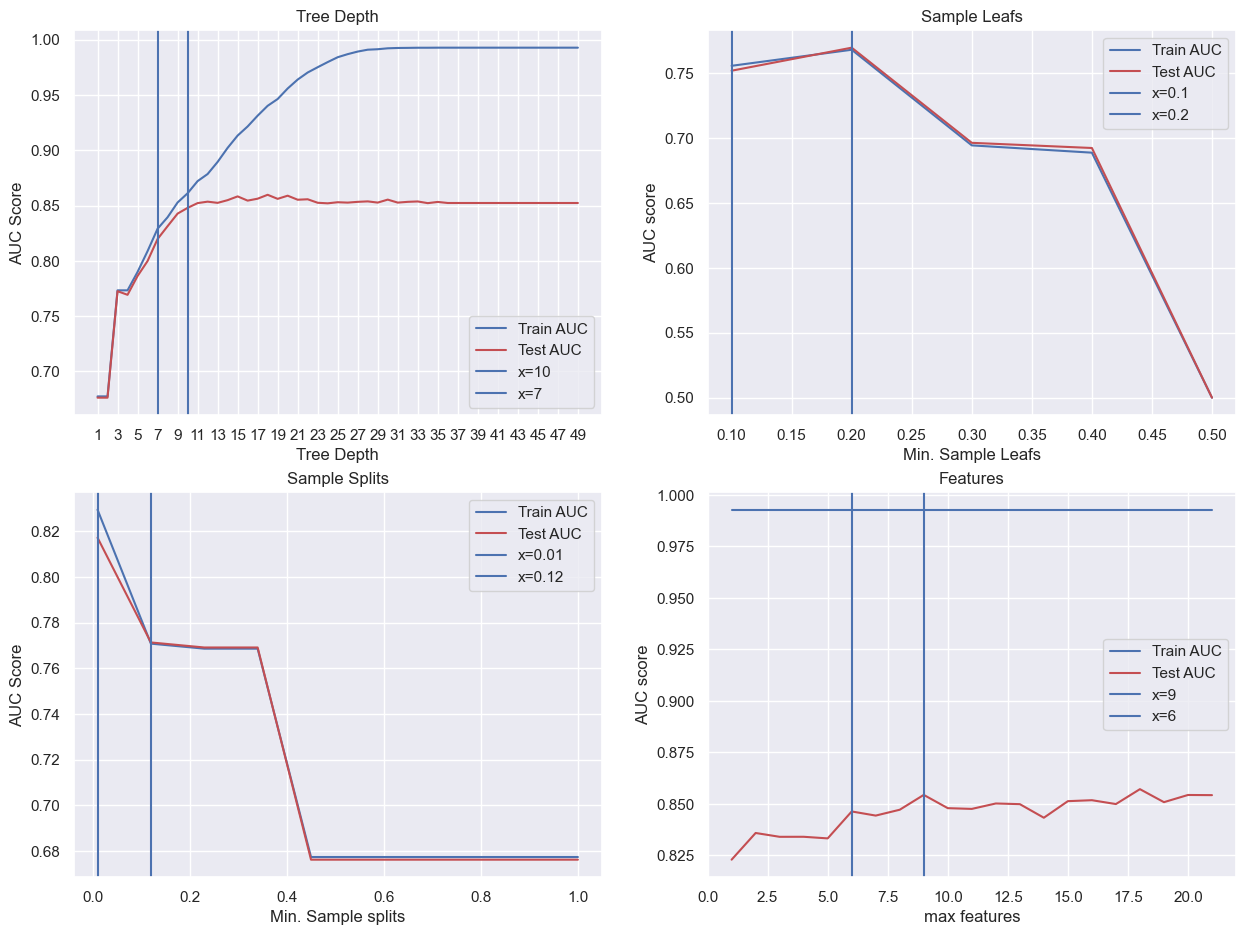

In [128]:
# Visualizing Decision tree parameters

#Max tree depth
fig, ax = plt.subplots(2, 2, figsize = (15,11))

ax[0,0].plot(max_depths, train_results_depth, 'b', label='Train AUC')
ax[0,0].plot(max_depths, test_results_depth, 'r', label='Test AUC')
ax[0,0].set_xticks(list(range(1, 50, 2)))
ax[0,0].axvline(x=10, label = 'x=10')
ax[0,0].axvline(x=7, label = 'x=7')
ax[0,0].set_title('Tree Depth')
ax[0,0].set_ylabel('AUC Score')
ax[0,0].set_xlabel('Tree Depth')
ax[0,0].legend()


# Min Saample Splits
ax[1,0].plot(min_samples_splits, train_results_splits, 'b', label='Train AUC')
ax[1,0].plot(min_samples_splits, test_results_splits, 'r', label='Test AUC')
ax[1,0].axvline(x=0.01, label = 'x=0.01')
ax[1,0].axvline(x=0.12, label = 'x=0.12')
ax[1,0].set_title('Sample Splits')
ax[1,0].set_ylabel('AUC Score')
ax[1,0].set_xlabel('Min. Sample splits')
ax[1,0].legend()


# Min Sample Leafs
ax[0,1].plot(min_samples_leafs, train_results_leaf, 'b', label='Train AUC')
ax[0,1].plot(min_samples_leafs, test_results_leaf, 'r', label='Test AUC')
ax[0,1].axvline(x=0.10, label = 'x=0.1')
ax[0,1].axvline(x=0.20, label = 'x=0.2')
ax[0,1].set_title('Sample Leafs')
ax[0,1].set_ylabel('AUC score')
ax[0,1].set_xlabel('Min. Sample Leafs')
ax[0,1].legend()


# Max features
ax[1,1].plot(max_features, train_results_feature, 'b', label='Train AUC')
ax[1,1].plot(max_features, test_results_feature, 'r', label='Test AUC')
ax[1,1].axvline(x=9, label = 'x=9')
ax[1,1].axvline(x=6, label = 'x=6')
ax[1,1].set_title('Features')
ax[1,1].set_ylabel('AUC score')
ax[1,1].set_xlabel('max features')
ax[1,1].legend()


Above graph shows Training error decreases with increasing tree depth - clear sign of overfitting, Training and test errors rapidly rise after 7 and 10.
AUC Score is high at min_sample splits starting at 0.01, next better score is near 0.07.
AUC gives the best score at 0.20 for both train and test data for min Sample Leafs. Accuracy drops down if we continue to increase the parameter value. No effect on training set, first highest AUC on test set is at 6 and 9. To avoid overfitting, ignoring 18 value. 

In [132]:
# Finding the Decision tree model with above optimal parameters

dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=9,
                           max_depth=10,
                           min_samples_split=0.01,
                           min_samples_leaf=0.01, 
                           random_state=100)

dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f"AUC: {cross_val_score(dt, X_test, y_test, cv=5, scoring = 'roc_auc').mean():.4f}")
print(f"Train Recall: {recall_score(y_train, y_train_pred):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"Train Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred):.4f}")

AUC: 0.8695
Train Recall: 0.6770
Test Recall: 0.6694
Train Precision: 0.7710
Test Precision: 0.7841
Train Accuracy: 0.8290
Test Accuracy: 0.8294
Train F1 Score: 0.7210
Test F1 Score: 0.7222


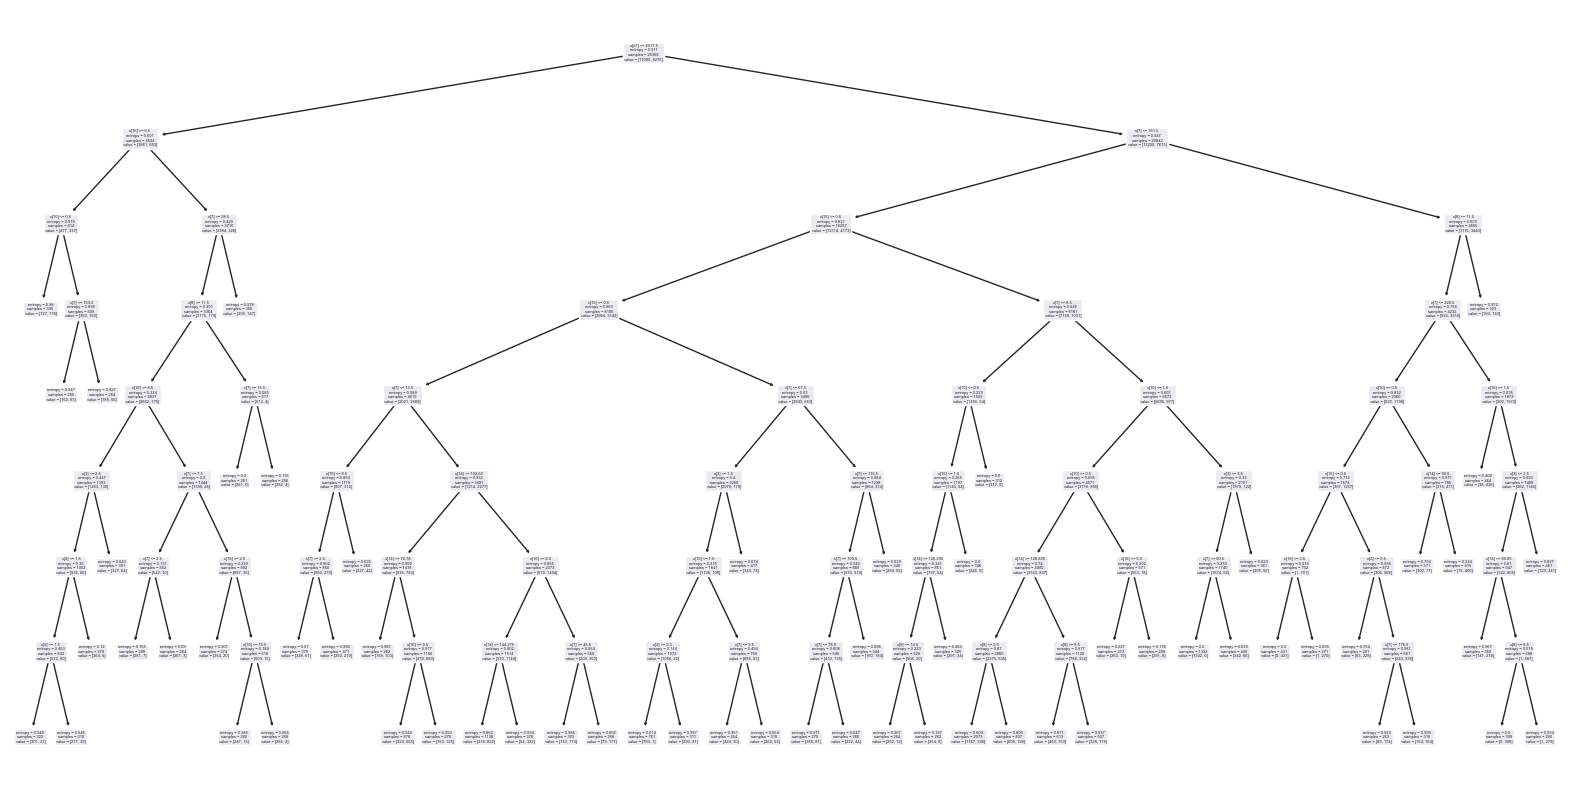

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize= (20,10))
plot_tree(dt)
plt.show()

In [133]:
# Decision Tree with optimized hyperparameter and high correlated features
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=9,
                           max_depth=10,
                           min_samples_split=0.01,
                           min_samples_leaf=0.01, 
                           random_state=100)

dt.fit(X_train_hicorr, y_train)
y_test_pred_hicorr = dt.predict(X_test_hicorr)
y_train_pred_hicorr = dt.predict(X_train_hicorr)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_hicorr)
roc_auc_hicorr = auc(false_positive_rate, true_positive_rate)

print(f"AUC: {cross_val_score(dt, X_test_hicorr, y_test, cv=5, scoring = 'roc_auc').mean():.4f}")
print(f"Train Recall: {recall_score(y_train, y_train_pred_hicorr):.4f}")
print(f"Test Recall: {recall_score(y_test, y_test_pred_hicorr):.4f}")
print(f"Train Precision: {precision_score(y_train, y_train_pred_hicorr):.4f}")
print(f"Test Precision: {precision_score(y_test, y_test_pred_hicorr):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_hicorr):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_hicorr):.4f}")
print(f"Train F1 Score: {f1_score(y_train, y_train_pred_hicorr):.4f}")
print(f"Test F1 Score: {f1_score(y_test, y_test_pred_hicorr):.4f}")


AUC: 0.8683
Train Recall: 0.7159
Test Recall: 0.6971
Train Precision: 0.7364
Test Precision: 0.7422
Train Accuracy: 0.8237
Test Accuracy: 0.8194
Train F1 Score: 0.7260
Test F1 Score: 0.7190


#### 7. Oversampling Technique for Imbalanced Dataset:

Since target variable `booking_status` was slightly imbalanced, Class 0 as 67% and class 1 as 32%. Checking Oversampling process through
SMOTE and using Logistic Regression, we don't need to loose/reduce our Data using oversampling technique, also current Dataset not a large dataset. 

In [49]:
from imblearn.over_sampling import SMOTE
df = hotel2_df[feature_selected]
X = df.drop(columns = ['booking_status'], axis=1)
y = df['booking_status']


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)
print(y_train.value_counts())

booking_status
0    17090
1     8276
Name: count, dtype: int64


In [51]:
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

booking_status
0    17090
1    17090
Name: count, dtype: int64


AUC for 0.005: 0.850637655833875 

AUC for 0.1: 0.8511585341171458 

AUC for 0.5: 0.8511145420509926 

AUC for 1: 0.8510935007068515 

AUC for 1.5: 0.8511048805989643 

AUC for 2: 0.8510871997598767 

AUC for 10.0: 0.8510927369557031 

AUC for 100.0: 0.8510798295612937 

AUC for 10000.0: 0.8509876829852283 

AUC for 100000.0: 0.8507681045300373 



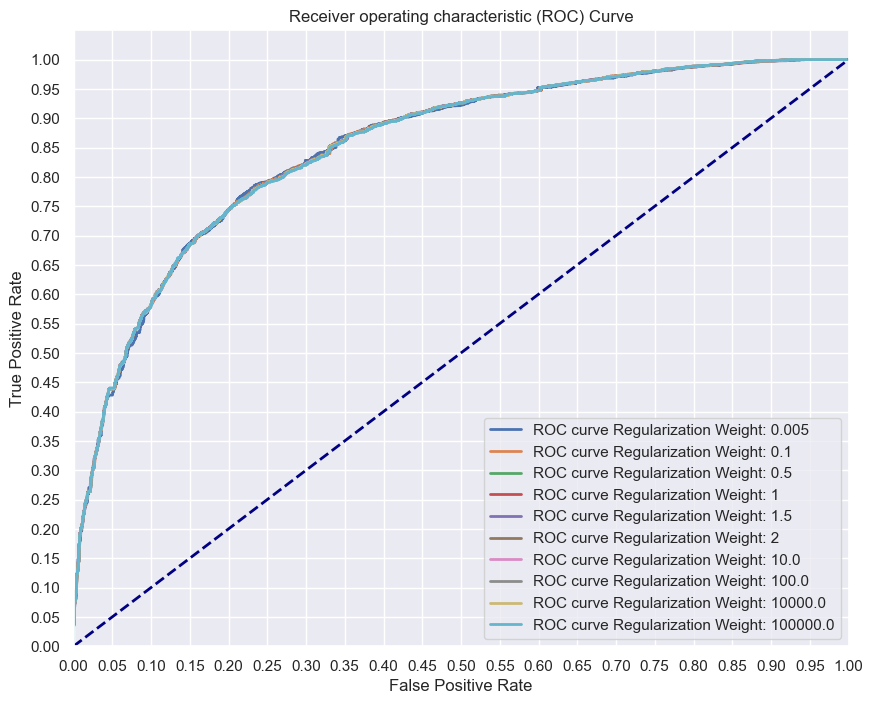

In [54]:
# Tuning hyperparameters to find the best model, using SMOTE for oversampling
from sklearn.metrics import roc_curve, auc

C_param_range = [0.005, 0.1, 0.5, 1, 1.5, 2, 1e1, 1e2, 1e4, 1e5]
names = [0.005, 0.1, 0.5, 1, 1.5, 2, 1e1, 1e2, 1e4, 1e5]


plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=c, max_iter = 1000, solver = 'liblinear', random_state=100)
    smote_model_log = logreg.fit(X_train_resampled, y_train_resampled)
    
    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)), '\n')
       
    lw = 2
    plt.plot(fpr, tpr,
             lw=lw, label='ROC curve Regularization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Highest AUC is 0.85, Oversampling technique didn't perform well after tuning hyperparameters. Logistic Regression Baseline model works better than 
Decision Tree and Oversampling models as of now. Checking Random Forest Classifier next to find our best model.

#### 8. Random Forest Classifier:

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting, Trees in the forest use the best split strategy.

In [96]:
#Random Forest with Max tree depth parameters
from sklearn.ensemble import RandomForestClassifier

max_depths_rf = list(range(1, 30))
train_results_rf_depth = []
test_results_rf_depth = []

#This for loop loops through possible max depth values of 1 - 30, calculates the AUC of the model given that value, and appends it to a list
for max_depth in max_depths_rf:
    rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy', max_depth = max_depth, random_state=100)
    rf.fit(X_train, y_train)
    #ROC curve based on train set
    train_pred_rf = rf.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred_rf)
    roc_auc = auc(fpr, tpr)
    train_results_rf_depth.append(roc_auc)
    #ROC curve based on test set
    test_pred_rf = rf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_rf)
    roc_auc = auc(fpr, tpr)
    test_results_rf_depth.append(roc_auc)

In [97]:
#Tested various minimum sample splits to find the ideal value
min_samples_splits_rf = np.linspace(0.01, 1.0, 10, endpoint=True)
train_results_rf_splits = []
test_results_rf_splits = []

#This for loop loops through possible minimum sample split values of 0.01 - 10, calculates the AUC of the model given that value, and appends it to a list
for min_samples_split in min_samples_splits_rf:
    rf = RandomForestClassifier(n_estimators=100, criterion = 'entropy', min_samples_split = min_samples_split, random_state=100)
    rf.fit(X_train, y_train)
    #ROC curve based on train set
    train_pred_rf = rf.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred_rf)
    roc_auc = auc(fpr, tpr)
    train_results_rf_splits.append(roc_auc)
    #ROC curve based on test set
    test_pred_rf = rf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_rf)
    roc_auc = auc(fpr, tpr)
    test_results_rf_splits.append(roc_auc)

In [99]:
#Tested various minimum sample leafs to find the ideal value
min_samples_leafs_rf = np.linspace(0.01, 0.5, 5, endpoint=True)
train_results_rf_leafs = []
test_results_rf_leafs = []

#This for loop loops through possible minimum sample leaf values of 0.01 - 5, calculates the AUC of the model given that value, and appends it to a list
for min_samples_leaf in min_samples_leafs_rf:
    rf = RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=100)
    rf.fit(X_train, y_train)
    #ROC curve based on train set
    train_pred_rf = rf.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred_rf)
    roc_auc = auc(fpr, tpr)
    train_results_rf_leafs.append(roc_auc)
    #ROC curve based on test set
    test_pred_rf = rf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_rf)
    roc_auc = auc(fpr, tpr)
    test_results_rf_leafs.append(roc_auc)

In [98]:
#Checking maximum features to find the ideal value
max_features_rf = list(range(1, 23))
train_results_rf_features = []
test_results_rf_features = []

#This for loop loops through possible minimum sample leaf values of 1 - 23 (number of features in data set), 
#calculates the AUC of the model given that value, and appends it to a list
for max_feature in max_features_rf:
    rf = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features=max_feature, random_state=100)
    rf.fit(X_train, y_train)
    #ROC curve based on train set
    train_pred_rf = rf.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred_rf)
    roc_auc = auc(fpr, tpr)
    train_results_rf_features.append(roc_auc)
    #ROC curve based on test set
    test_pred_rf = rf.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_rf)
    roc_auc = auc(fpr, tpr)
    test_results_rf_features.append(roc_auc)

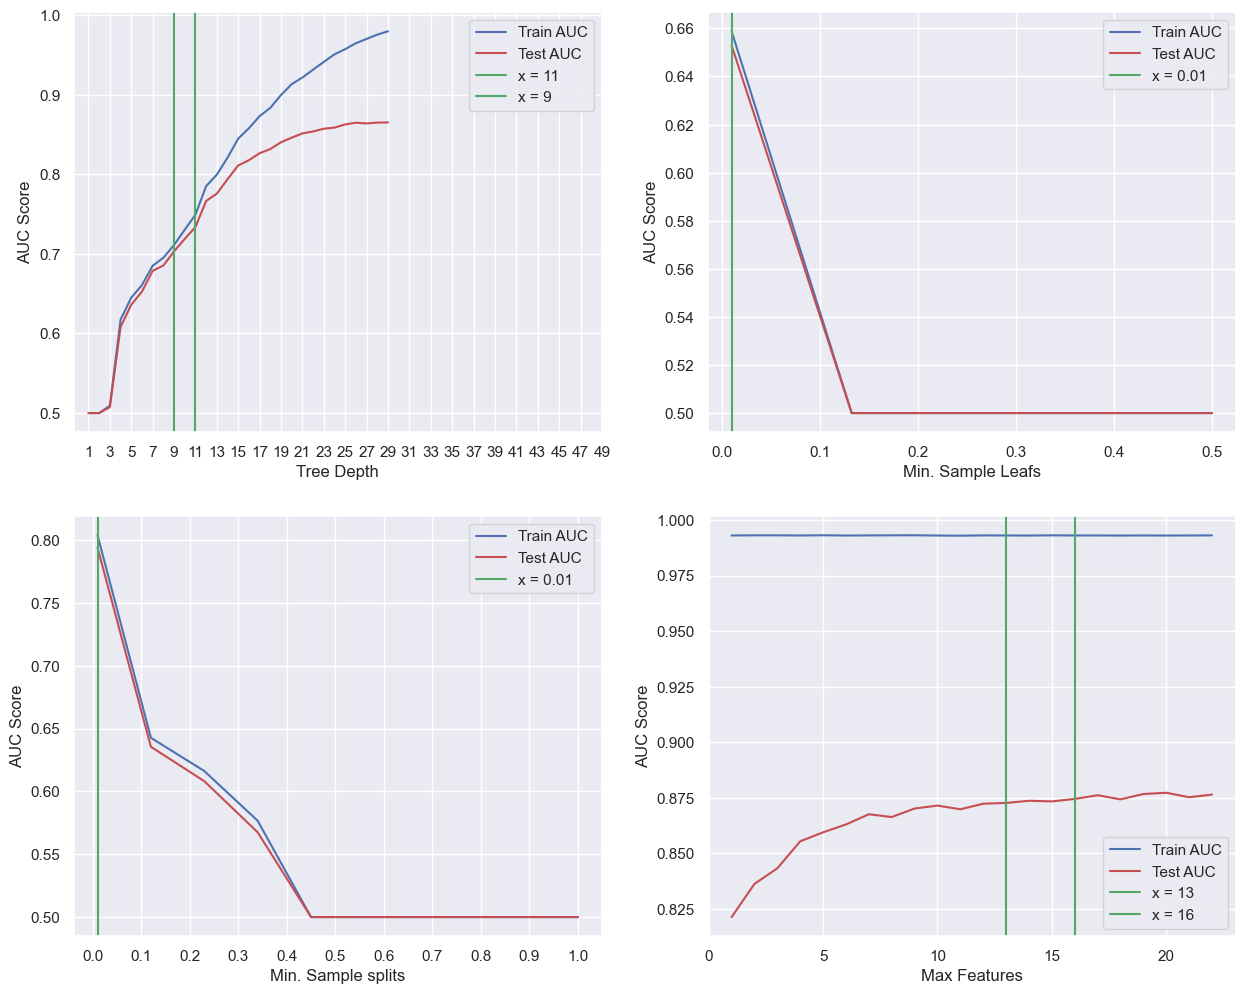

In [100]:
#Visualized effects of various hyperparameter values on AUC for RandomForestClassifier model

fig, axs = plt.subplots(2, 2, figsize = (15,12))

axs[0,0].plot(max_depths_rf, train_results_rf_depth, 'b', label='Train AUC')
axs[0,0].plot(max_depths_rf, test_results_rf_depth, 'r', label='Test AUC')
axs[0,0].axvline(x=11, color = 'g', label = 'x = 11')
axs[0,0].axvline(x=9, color = 'g', label = 'x = 9')
axs[0,0].set_xticks(list(range(1, 50, 2)))
#axs[0,0].set_title('Tree Depth')
axs[0,0].set_ylabel('AUC Score')
axs[0,0].set_xlabel('Tree Depth')
axs[0,0].legend()

axs[1,0].plot(min_samples_splits_rf, train_results_rf_splits, 'b', label='Train AUC')
axs[1,0].plot(min_samples_splits_rf, test_results_rf_splits, 'r', label='Test AUC')
axs[1,0].axvline(x=0.01, color = 'g', label = 'x = 0.01')
axs[1,0].set_xticks(list(np.arange(0, 1.1, 0.1)))
#axs[1,0].set_title('Min. Sample Splits')
axs[1,0].set_ylabel('AUC Score')
axs[1,0].set_xlabel('Min. Sample splits')
axs[1,0].legend()

axs[0,1].plot(min_samples_leafs_rf, train_results_rf_leafs, 'b', label='Train AUC')
axs[0,1].plot(min_samples_leafs_rf, test_results_rf_leafs, 'r', label='Test AUC')
axs[0,1].axvline(x=0.01, color = 'g', label = 'x = 0.01')
#axs[0,1].set_title('Min. Sample Leafs')
axs[0,1].set_ylabel('AUC Score')
axs[0,1].set_xlabel('Min. Sample Leafs')
axs[0,1].legend();

axs[1,1].plot(max_features_rf, train_results_rf_features, 'b', label='Train AUC')
axs[1,1].plot(max_features_rf, test_results_rf_features, 'r', label='Test AUC')
axs[1,1].axvline(x=13, color = 'g', label = 'x = 13')
axs[1,1].axvline(x=16, color = 'g', label = 'x = 16')
#axs[1,1].set_title('Max Features')
axs[1,1].set_ylabel('AUC Score')
axs[1,1].set_xlabel('Max Features')
axs[1,1].legend();

As per above graph, Max tree depth goes overfitting after 11, Min sample splits 0.01 with max AUC score, Min smaple leafs
0.01 with max score, and finally Max feature has high AUC score at 13 and 17. 

In [114]:
#Calculated AUC for RandomForestClassifier model with calculated optimum hyperparameters

rf_classifier_params = RandomForestClassifier(n_estimators=100, max_features=19, max_depth=13, min_samples_split=0.01, min_samples_leaf=0.01, criterion = 'entropy', random_state=100)
rf_classifier_params.fit(X_train, y_train)
y_proba_params = rf_classifier_params.predict_proba(X_test)[:, 1]
roc_auc_params = roc_auc_score(y_test, y_proba_params)
train_pred_rf_params = rf_classifier_params.predict(X_train)
test_pred_rf_params = rf_classifier_params.predict(X_test)
print(f"AUC: {cross_val_score(rf_classifier_params, X_test, y_test, cv=5, scoring = 'roc_auc').mean():.4f}")
print(f"Train Recall: {recall_score(y_train, train_pred_rf_params):.4f}")
print(f"Test Recall: {recall_score(y_test, test_pred_rf_params):.4f}")
print(f"Train Precision: {precision_score(y_train, train_pred_rf_params):.4f}")
print(f"Test Precision: {precision_score(y_test, test_pred_rf_params):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, train_pred_rf_params):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred_rf_params):.4f}")
print(f"Train F1 Score: {f1_score(y_train, train_pred_rf_params):.4f}")
print(f"Test F1 Score: {f1_score(y_test, test_pred_rf_params):.4f}")

AUC: 0.8785
Train Recall: 0.5638
Test Recall: 0.5505
Train Precision: 0.8032
Test Precision: 0.8110
Train Accuracy: 0.8126
Test Accuracy: 0.8086
Train F1 Score: 0.6625
Test F1 Score: 0.6559


In [70]:
#Calculated AUC for BaseModel RandomForestClassifier model with default hyperparameters

rf_classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=100)
rf_classifier.fit(X_train, y_train)
y_proba_rf = rf_classifier.predict_proba(X_test)[:, 1]
train_pred_rf = rf_classifier.predict(X_train)
test_pred_rf = rf_classifier.predict(X_test)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"AUC: {cross_val_score(rf_classifier, X_test, y_test, cv=5, scoring = 'roc_auc').mean():.4f}")
print(f"Train Recall: {recall_score(y_train, train_pred_rf):.4f}")
print(f"Test Recall: {recall_score(y_test, test_pred_rf):.4f}")
print(f"Train Precision: {precision_score(y_train, train_pred_rf):.4f}")
print(f"Test Precision: {precision_score(y_test, test_pred_rf):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, train_pred_rf):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred_rf):.4f}")
print(f"Train F1 Score: {f1_score(y_train, train_pred_rf):.4f}")
print(f"Test F1 Score: {f1_score(y_test, test_pred_rf):.4f}")

AUC: 0.9386
Train Recall: 0.9877
Test Recall: 0.8018
Train Precision: 0.9961
Test Precision: 0.8886
Train Accuracy: 0.9947
Test Accuracy: 0.9010
Train F1 Score: 0.9919
Test F1 Score: 0.8430


In [121]:
#Calculated AUC for RandomForestClassifier model with only highly correlated features

rf_classifier_hicorr = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=100)
rf_classifier_hicorr.fit(X_train_hicorr, y_train)
y_proba_rf_hicorr = rf_classifier_hicorr.predict_proba(X_test_hicorr)[:, 1]
roc_auc_rf_hicorr = roc_auc_score(y_test, y_proba_rf_hicorr)

train_pred_rf_hicorr = rf_classifier_hicorr.predict(X_train_hicorr)
test_pred_rf_hicorr = rf_classifier_hicorr.predict(X_test_hicorr)

print(f"AUC: {cross_val_score(rf_classifier_hicorr, X_test_hicorr, y_test, cv=5, scoring = 'roc_auc').mean():.4f}")
print(f"Train Recall: {recall_score(y_train, train_pred_rf_hicorr):.4f}")
print(f"Test Recall: {recall_score(y_test, test_pred_rf_hicorr):.4f}")
print(f"Train Precision: {precision_score(y_train, train_pred_rf_hicorr):.4f}")
print(f"Test Precision: {precision_score(y_test, test_pred_rf_hicorr):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, train_pred_rf_hicorr):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred_rf_hicorr):.4f}")
print(f"Train F1 Score: {f1_score(y_train, train_pred_rf_hicorr):.4f}")
print(f"Test F1 Score: {f1_score(y_test, test_pred_rf_hicorr):.4f}")

AUC: 0.9261
Train Recall: 0.9844
Test Recall: 0.7807
Train Precision: 0.9941
Test Precision: 0.8631
Train Accuracy: 0.9930
Test Accuracy: 0.8863
Train F1 Score: 0.9893
Test F1 Score: 0.8198


In [117]:
# Random Forest Classifier with high correlated features and tuned hyperparameters

rf_classifier_hicorr_params = RandomForestClassifier(n_estimators=100, criterion = 'entropy',  max_features=19, max_depth=13, min_samples_split=0.01, min_samples_leaf=0.01, random_state=100)
rf_classifier_hicorr_params.fit(X_train_hicorr, y_train)
y_proba_rf_hicorr_params = rf_classifier_hicorr_params.predict_proba(X_test_hicorr)[:, 1]
roc_auc_rf_hicorr_params = roc_auc_score(y_test, y_proba_rf_hicorr_params)

train_pred_rf_hicorr_params = rf_classifier_hicorr_params.predict(X_train_hicorr)
test_pred_rf_hicorr_params = rf_classifier_hicorr_params.predict(X_test_hicorr)

print(f"AUC: {cross_val_score(rf_classifier_hicorr_params, X_test_hicorr, y_test, cv=5, scoring = 'roc_auc').mean():.4f}")
print(f"Train Recall: {recall_score(y_train, train_pred_rf_hicorr_params):.4f}")
print(f"Test Recall: {recall_score(y_test, test_pred_rf_hicorr_params):.4f}")
print(f"Train Precision: {precision_score(y_train, train_pred_rf_hicorr_params):.4f}")
print(f"Test Precision: {precision_score(y_test, test_pred_rf_hicorr_params):.4f}")
print(f"Train Accuracy: {accuracy_score(y_train, train_pred_rf_hicorr_params):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred_rf_hicorr_params):.4f}")
print(f"Train F1 Score: {f1_score(y_train, train_pred_rf_hicorr_params):.4f}")
print(f"Test F1 Score: {f1_score(y_test, test_pred_rf_hicorr_params):.4f}")

AUC: 0.8850
Train Recall: 0.6340
Test Recall: 0.6272
Train Precision: 0.8097
Test Precision: 0.8203
Train Accuracy: 0.8320
Test Accuracy: 0.8309
Train F1 Score: 0.7112
Test F1 Score: 0.7108


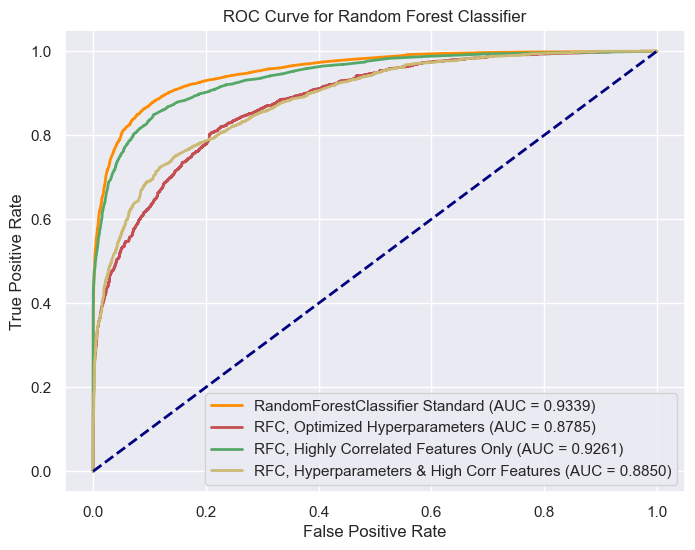

In [122]:
#Visualized ROC curve for RandomForestClassifier model

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
fpr_params, tpr_params, thresholds_params = roc_curve(y_test, y_proba_params)
fpr_hicorr, tpr_hicorr, thresholds_hicorr = roc_curve(y_test, y_proba_rf_hicorr)
fpr_hicorr_params, tpr_hicorr_params, thresholds_hicorr_params = roc_curve(y_test, y_proba_rf_hicorr_params)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'RandomForestClassifier Standard (AUC = {cross_val_score(rf_classifier, X_test, y_test, cv=5, scoring = "roc_auc").mean():.4f})', color='darkorange',
         lw=lw)
plt.plot(fpr_params, tpr_params, label=f'RFC, Optimized Hyperparameters (AUC = {cross_val_score(rf_classifier_params, X_test, y_test, cv=5, scoring = "roc_auc").mean():.4f})', color = 'r', lw=lw)
plt.plot(fpr_hicorr, tpr_hicorr, label=f'RFC, Highly Correlated Features Only (AUC = {cross_val_score(rf_classifier_hicorr, X_test_hicorr, y_test, cv=5, scoring = "roc_auc").mean():.4f})', color = 'g', lw=lw)
plt.plot(fpr_hicorr_params, tpr_hicorr_params, label=f'RFC, Hyperparameters & High Corr Features (AUC = {cross_val_score(rf_classifier_hicorr_params, X_test_hicorr, y_test, cv=5, scoring = "roc_auc").mean():.4f})', color = 'y', lw=lw)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw = lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

Above graph shows high AUC for Standard RandomForestClassifier, but model with Optimized Hyperparameters and high correlated
features has best metrics compared to others. Both Baseline Standard and High correlated feature model shows best Train metrics
and bad test metrics, which is clear sign of overfitting. So we are concluding RandomForestClassifier with Optimized hyperparameters 
and High correlated features is our best model to solve Stakeholder's Business problem.